In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 

In [6]:
df = pd.read_csv(filepath_or_buffer="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv")

In [8]:
df

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,233,Lenovo,4,2,1,7,14.0,0.896552,8,256,3.74850,1891,Medium,0,1
234,234,234,Toshiba,3,2,1,5,13.3,0.827586,8,256,2.64600,1950,Medium,1,0
235,235,235,Lenovo,4,2,1,5,12.0,0.896552,8,256,2.99880,2236,Medium,0,1
236,236,236,Lenovo,3,3,1,5,15.6,0.862069,6,256,5.29200,883,Low,1,0


In [84]:
X = df[['CPU_frequency']]
Y = df[['Price']]
name = 'CPU_frequency'

In [12]:
lm = LinearRegression()

In [14]:
lm.fit(X,Y)

LinearRegression()

In [18]:
yhat =lm.predict(X)
yhat[0:5]

array([[1073.07834392],
       [1277.93263722],
       [1636.42765051],
       [1073.07834392],
       [1175.50549057]])

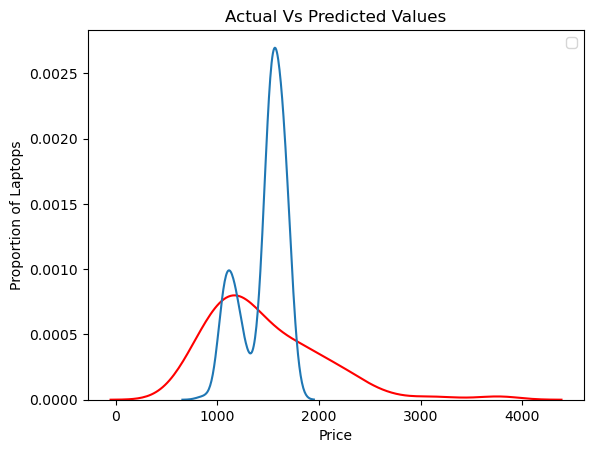

In [36]:
ax1 = sns.kdeplot(df['Price'],color="r",label='Actual Values')
sns.kdeplot(yhat,color="b",label='Predicted Values')
plt.title('Actual Vs Predicted Values')
plt.xlabel('Price')
plt.ylabel('Proportion of Laptops')
plt.legend('Actual Value','Predicted Value')

In [26]:
print('R-square value is:',lm.score(X,Y))

R-square value is: 0.1344436321024326


In [28]:
mse = mean_squared_error(yhat,Y)
print('The Mean Squared Error is:',mse)

The Mean Squared Error is: 284583.4405868629


In [38]:
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]

In [40]:
lm1 = LinearRegression()

In [42]:
lm1.fit(Z,Y)

LinearRegression()

In [44]:
yhat1 =lm1.predict(Z)
yhat1[0:10]

array([[1345.51622771],
       [ 710.44905496],
       [1552.37242687],
       [1295.00681012],
       [1543.13847022],
       [1056.42067418],
       [1252.02084839],
       [ 806.98504446],
       [1007.51446753],
       [1449.64309091]])

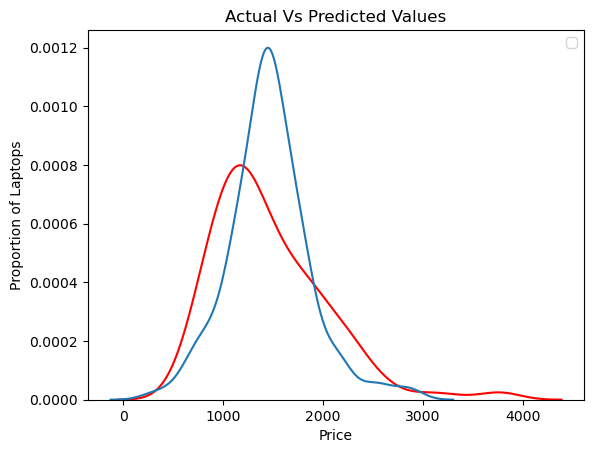

In [50]:
ax2 = sns.kdeplot(df['Price'],color="r",label='Actual Values')
sns.kdeplot(yhat1,color="b",label='Predicted Values')
plt.title('Actual Vs Predicted Values')
plt.xlabel('Price')
plt.ylabel('Proportion of Laptops')
plt.legend('Actual Values','Predicted Values')

In [52]:
print('R-square value is:',lm1.score(Z,Y))

R-square value is: 0.5082509055187374


In [56]:
mse1 = mean_squared_error(yhat1,Y)
print('Mean Squared Error is:',mse1)

Mean Squared Error is: 161680.57263893107


In [70]:
x = df['CPU_frequency']
y = df['Price']

In [72]:
f = np.polyfit(x,y,3)

In [76]:
p = np.poly1d(f)
p

poly1d([ 34090.28459545, -65742.18380715,  41288.68534408,  -7238.3350619 ])

In [78]:
f1 = np.polyfit(x,y,5)
p1 = np.poly1d(f1)
p1

poly1d([ 1357222.50878669, -4719545.23454403,  6458170.08673142,
       -4336492.05989682,  1425400.75894514,  -181813.39396556])

In [80]:
f2 = np.polyfit(x,y,7)
p2 = np.poly1d(f2)
p2

poly1d([-9.21175511e+07,  4.83452705e+08, -1.07282106e+09,  1.30389621e+09,
       -9.36621614e+08,  3.97280138e+08, -9.20425978e+07,  8.97672062e+06])

In [82]:
x_range = np.linspace(x.min(),x.max(),100)
y_polly = p(x_range)

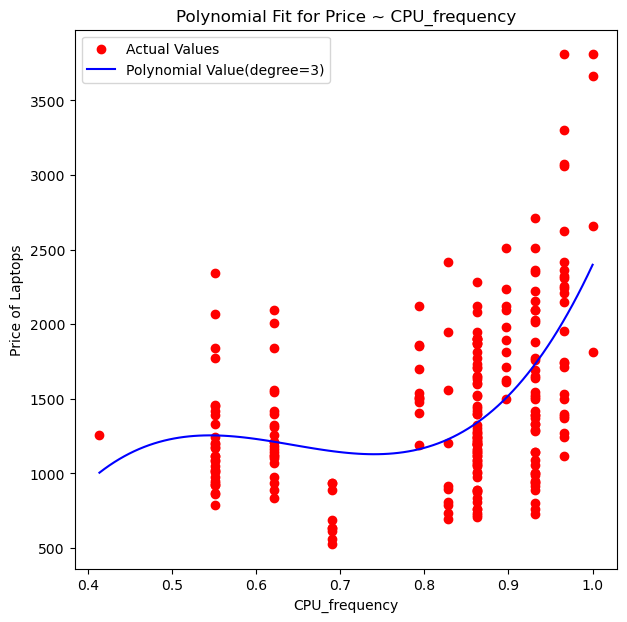

In [100]:
plt.figure(figsize=(7,7))
plt.scatter(x,y,color="r",label='Actual Values')
plt.plot(x_range,y_polly,color="b",label='Polynomial Value(degree=3)')
plt.title(f'Polynomial Fit for Price ~ {name}')
plt.xlabel(name)
plt.ylabel('Price of Laptops')
plt.legend()

In [96]:
x_range1 = np.linspace(x.min(),x.max(),100)
y_polly1 = p1(x_range)

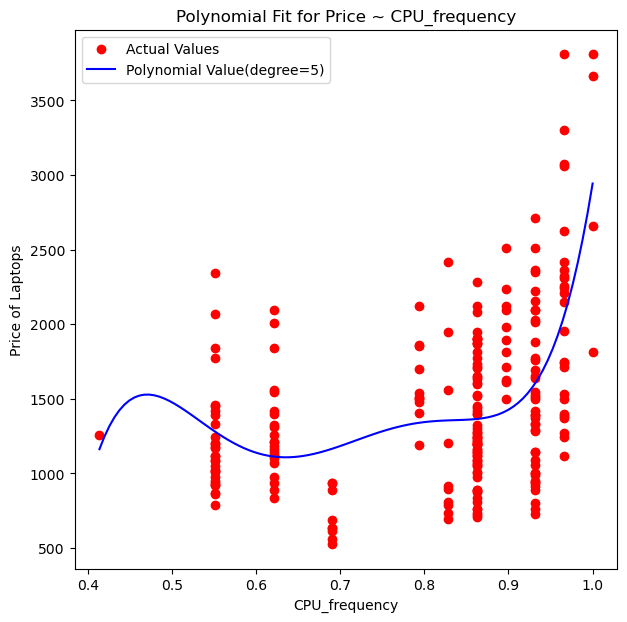

In [108]:
plt.figure(figsize=(7,7))
plt.scatter(x,y,color="r",label='Actual Values')
plt.plot(x_range1,y_polly1,color="b",label='Polynomial Value(degree=5)')
plt.title(f'Polynomial Fit for Price ~ {name}')
plt.xlabel(name)
plt.ylabel('Price of Laptops')
plt.legend()

In [106]:
x_range2 = np.linspace(x.min(),x.max(),100)
y_polly2 = p2(x_range)

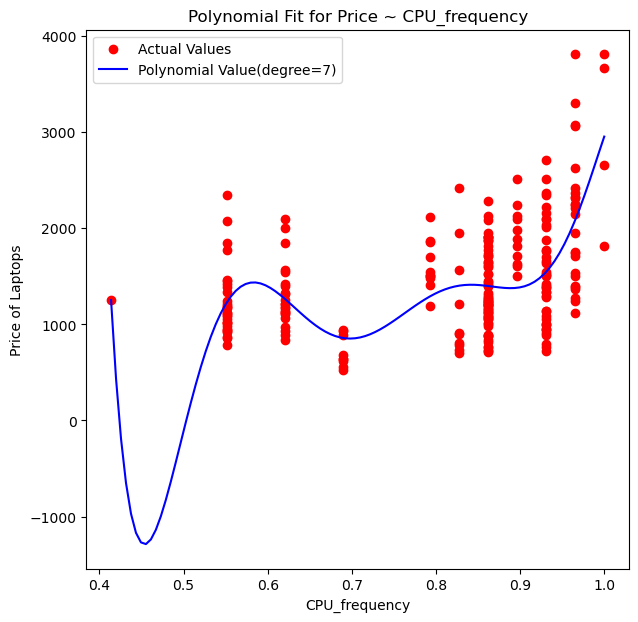

In [110]:
plt.figure(figsize=(7,7))
plt.scatter(x,y,color="r",label='Actual Values')
plt.plot(x_range2,y_polly2,color="b",label='Polynomial Value(degree=7)')
plt.title(f'Polynomial Fit for Price ~ {name}')
plt.xlabel(name)
plt.ylabel('Price of Laptops')
plt.legend()

In [120]:
print('The R-square value for 3rd degree polynomial is:',r2_score(p(x),y))
print('The Mean Squared Error is:',mean_squared_error(p(x),y))      

The R-square value for 3rd degree polynomial is: -1.746350942279261
The Mean Squared Error is: 241024.86303848817


In [122]:
print('The R-square value for 5th degree polynomial is:',r2_score(p1(x),y))
print('The Mean Squared Error is:',mean_squared_error(p1(x),y))      

The R-square value for 5th degree polynomial is: -1.299434169710084
The Mean Squared Error is: 229137.29548054867


In [124]:
print('The R-square value for 7th degree polynomial is:',r2_score(p2(x),y))
print('The Mean Squared Error is:',mean_squared_error(p2(x),y))      

The R-square value for 7th degree polynomial is: -1.0751421952912201
The Mean Squared Error is: 221869.154225139


In [128]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
ypipe[0:10]

array([[1484.1796875 ],
       [ 778.55078125],
       [1267.99609375],
       [1009.30078125],
       [1505.46875   ],
       [1152.09765625],
       [1045.703125  ],
       [1028.96484375],
       [ 812.88671875],
       [1187.6015625 ]])

In [134]:
print('The R-square value is:',r2_score(ypipe,y))
print('The Mean Squared Error is:',mean_squared_error(ypipe,y))      

The R-square value is: 0.42081310984497056
The Mean Squared Error is: 120596.17626203009
